## 1 - Statistiques sur les émissions :

### 1.1.1) Emissions totales par communes, régions et départements :

J'ai préféré créer de nouveaux dataframes auxiliaires pour chaque sous résultats. A chaque question je n'afficherais que les 10 premières lignes avec la fonction head() pour vérifier la forme des solutions.

In [145]:
import polars as pl
file = 'emissions_communes_polars.csv'
types = {'commune_code_insee' : pl.Utf8, 'departement_code' : pl.Utf8}
emissions_communes_df = pl.read_csv(file,separator= ',', dtypes= types)
print(emissions_communes_df.shape)
emissions_communes_df.head()

(34857, 16)


region_code,region_name,departement_code,commune_code_insee,commune,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
i64,str,str,str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
84,"""Auvergne-Rhône…","""01""","""01001""","""L'Abergement-C…",848,3711.425991,592.828315,14367.370159,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
84,"""Auvergne-Rhône…","""01""","""01002""","""L'Abergement-d…",273,475.330205,592.828315,14367.370159,140.74166,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207
84,"""Auvergne-Rhône…","""01""","""01004""","""Ambérieu-en-Bu…",15240,499.043526,212.577908,14367.370159,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934
84,"""Auvergne-Rhône…","""01""","""01005""","""Ambérieux-en-D…",1921,1859.160954,186.041362,14367.370159,1144.429311,216.217508,94.18231,276.448534,663.683146,1756.341319,782.404357
84,"""Auvergne-Rhône…","""01""","""01006""","""Ambléon""",113,448.966808,159.504815,14367.370159,77.033834,48.401549,662.569846,2423.127789,43.714019,398.7868,51.681756


Comme avec pandas on va devoir groupby sur les codes insee et pas sur les noms de commune directement. 
Documentation : 
https://docs-pola-rs.translate.goog/py-polars/html/reference/dataframe/api/polars.DataFrame.group_by.html?_x_tr_sl=en&_x_tr_tl=fr&_x_tr_hl=fr&_x_tr_pto=sc

https://docs.pola.rs/py-polars/html/reference/dataframe/api/polars.DataFrame.n_unique.html

https://docs.pola.rs/py-polars/html/reference/expressions/api/polars.sum_horizontal.html

In [146]:
nombre_ville = emissions_communes_df.n_unique('commune')
n_code = emissions_communes_df.n_unique('commune_code_insee')
print(nombre_ville == n_code) #On groupe sur les codes 

emissions_communes_com = emissions_communes_df.group_by('commune_code_insee').sum()
emissions_communes_com = emissions_communes_com.drop(['region_name', 'commune', 'departement_code'])

colonnes = ['agriculture_filled', 'transports_filled', 'transports_international_filled', 'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled', 'residentiel_filled', 'routier_filled', 'tertiaire']


emissions_communes_com = emissions_communes_com.with_columns(emissions_totales_com = pl.sum_horizontal(colonnes))
emissions_communes_com = emissions_communes_com.sort('commune_code_insee')

emissions_communes_com.head()


False


commune_code_insee,region_code,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire,emissions_totales_com
str,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""01001""",84,848,3711.425991,592.828315,14367.370159,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172,20684.623416
"""01002""",84,273,475.330205,592.828315,14367.370159,140.74166,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207,16293.010094
"""01004""",84,15240,499.043526,212.577908,14367.370159,10313.446515,5314.314445,998.332482,2930.354461,16616.822534,15642.420313,10732.376934,77627.059278
"""01005""",84,1921,1859.160954,186.041362,14367.370159,1144.429311,216.217508,94.18231,276.448534,663.683146,1756.341319,782.404357,21346.27896
"""01006""",84,113,448.966808,159.504815,14367.370159,77.033834,48.401549,662.569846,2423.127789,43.714019,398.7868,51.681756,18681.157376


In [147]:
nombre_region = emissions_communes_df.n_unique('region_name')
nombre_codes_regions = emissions_communes_df.n_unique('region_code')
print(nombre_region == nombre_codes_regions)

emissions_communes_reg = emissions_communes_df.group_by('region_name').sum()
emissions_communes_reg = emissions_communes_reg.drop(['commune', 'departement_code', 'region_code', 'commune_code_insee'])

colonnes = ['agriculture_filled', 'transports_filled', 'transports_international_filled', 'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled', 'residentiel_filled', 'routier_filled', 'tertiaire']

emissions_communes_reg = emissions_communes_reg.with_columns(emissions_totales_reg = pl.sum_horizontal(colonnes))
emissions_communes_reg = emissions_communes_reg.sort('region_name')

emissions_communes_reg.head(10)

True


region_name,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire,emissions_totales_reg
str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Auvergne-Rhône…",8284162,1.0314e7,1.3427e6,5.1709e7,9.0497e6,2.9276e6,1.9759e6,1.0316e7,7.6355e6,1.6301e7,4.8521e6,1.1642e8
"""Bourgogne-Fran…",2872386,7.9804e6,854975.257411,103774.925638,4.3488e6,552936.000089,581711.140894,3.2437e6,3.4206e6,7.8621e6,1.8068e6,3.0756e7
"""Bretagne""",3482543,7.5042e6,985073.035432,1.0595e6,3.3041e6,642880.151717,397930.296767,1.5882e6,2.8693e6,6.4398e6,2.0648e6,2.6856e7
"""Centre-Val de …",2630743,5.3153e6,276194.318557,6.6396e6,3.1970e6,454895.917938,394419.257164,2.3671e6,2.8320e6,6.7952e6,1.6888e6,2.9961e7
"""Corse""",352559,495205.964238,306344.904728,1.5541e6,883741.165473,29162.181217,94571.547632,76322.587933,143395.996453,609682.912185,182671.64825,4.3752e6
"""Grand Est""",5665457,8.6985e6,1.7240e6,5.0927e6,7.2850e6,1.2287e6,1.4440e6,1.2464e7,7.3390e6,1.2537e7,3.6869e6,6.1500e7
"""Hauts-de-Franc…",6085665,6.1901e6,850815.959006,6.6417e6,5.4108e6,1.3936e6,2.9813e6,1.6012e7,7.3303e6,1.1156e7,3.7100e6,6.1677e7
"""Normandie""",3397867,6.8333e6,416716.871151,1.6623e7,3.8954e6,802643.999111,4.8351e6,8.1181e6,3.2834e6,7.0166e6,2.1333e6,5.3957e7
"""Nouvelle-Aquit…",6206404,1.2594e7,2.7630e6,2.6476e7,7.0684e6,1.4145e6,676278.879364,5.2127e6,5.7652e6,1.3742e7,3.6215e6,7.9333e7


In [148]:
emissions_communes_dep = emissions_communes_df.group_by('departement_code').sum()
emissions_communes_dep = emissions_communes_dep.drop(['commune', 'region_name', 'region_code', 'commune_code_insee'])

colonnes = ['agriculture_filled', 'transports_filled', 'transports_international_filled', 'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled', 'residentiel_filled', 'routier_filled', 'tertiaire']

emissions_communes_dep = emissions_communes_dep.with_columns(emissions_totales_dep = pl.sum_horizontal(colonnes))
emissions_communes_dep = emissions_communes_dep.sort('departement_code')

emissions_communes_dep.head(10)

departement_code,population_totale,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire,emissions_totales_dep
str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""01""",678981,784141.868573,39644.778826,204720.469167,703148.13738,270526.994907,108433.971338,709231.28432,546437.687545,1.5995e6,412255.462975,5.3781e6
"""02""",539099,1.2707e6,171846.233533,13546.885745,615899.788193,180007.937389,68295.798504,766334.600976,637882.728847,1.3811e6,324154.207262,5.4298e6
"""03""",343485,1.9471e6,69446.61942,1.1380e7,565740.821993,111205.867274,104300.164514,462359.659887,445664.84285,1.1641e6,224438.68186,1.6474e7
"""04""",170650,360410.46212,35617.188896,7.4629e7,115775.438355,50497.301309,14835.115696,70591.740365,116640.2416,388299.322975,98069.382968,7.5880e7
"""05""",145357,300353.499207,22347.174155,1.1335e8,83727.598246,22099.068688,10091.144652,32968.264643,121515.999855,347697.598318,77274.057096,1.1436e8
"""06""",1117561,108209.815132,696062.713416,1.2278e8,639815.191944,236402.348703,70783.17762,856433.811688,791496.717501,1.5617e6,564933.230101,1.2831e8
"""07""",340043,375352.452105,77417.62148,435367.480852,313755.936912,58546.889422,45035.1496,829957.273856,233598.932584,565001.59086,189422.120584,3.1235e6
"""08""",274783,1.0377e6,123707.622124,9451.476276,454031.767596,83104.819444,55963.07435,274471.456264,386294.995115,592140.107312,176625.617337,3.1935e6
"""09""",158578,424096.37309,17187.060933,3235.53962,167479.024605,33967.969363,38884.963717,229861.268963,139679.846743,393772.218696,89083.134719,1.5372e6


En comparant avec les résultats trouvés avec pandas on obtient bien les mêmes résultats 

### 1.1.2 ) Population par communes, département et région :
Il nous suffit de l'extraire de nos dataframes auxiliaires et on réutilise les fonctions découvertes dans la partie 2 (select et col)

In [149]:
print('Le nombre d\'habitants par ville est :')
emissions_communes_com.select(pl.col(['commune_code_insee','population_totale'])).head(10)

Le nombre d'habitants par ville est :


commune_code_insee,population_totale
str,i64
"""01001""",848
"""01002""",273
"""01004""",15240
"""01005""",1921
"""01006""",113
"""01007""",2951
"""01008""",781
"""01009""",330
"""01010""",1149


In [150]:
print('Le nombre d\'habitants par région est :')
emissions_communes_reg.select(pl.col(['region_name','population_totale']))

Le nombre d'habitants par région est :


region_name,population_totale
str,i64
"""Auvergne-Rhône…",8284162
"""Bourgogne-Fran…",2872386
"""Bretagne""",3482543
"""Centre-Val de …",2630743
"""Corse""",352559
…,…
"""Nouvelle-Aquit…",6206404
"""Occitanie""",6144768
"""Pays de la Loi…",3944100


In [151]:
print('Le nombre d\'habitants par département est :')
emissions_communes_dep.select(pl.col(['departement_code','population_totale'])).head(10)

Le nombre d'habitants par département est :


departement_code,population_totale
str,i64
"""01""",678981
"""02""",539099
"""03""",343485
"""04""",170650
"""05""",145357
"""06""",1117561
"""07""",340043
"""08""",274783
"""09""",158578


### 1.1.3) Emissions totales par types d'émissions

A nouveau la fonction sum() appliquées aux bonnes colonnes suffit

In [152]:
emissions_totales_df = emissions_communes_df.select(pl.col(['agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire'])).sum()
print('Les valeurs affichées sont en tonnes de GHG')
emissions_totales_df.head(10)

Les valeurs affichées sont en tonnes de GHG


agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
8.5600e7,2.1001e7,5.0691e8,6.3038e7,1.4525e7,2.3327e7,8.5254e7,6.3456e7,1.2500e8,3.9243e7


On va aussi le faire pour chaque département et chaque région, cela permettra de détailler un peu plus les données lors d'un tracé. 

In [153]:
emissions_totales_dep = emissions_communes_df.group_by('departement_code').sum()
emissions_totales_dep = emissions_totales_dep.select(pl.col(['departement_code','agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']))
emissions_totales_dep = emissions_totales_dep.sort('departement_code')

print('Les valeurs affichées sont en tonnes de GHG')
emissions_totales_dep.head(10)

Les valeurs affichées sont en tonnes de GHG


departement_code,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""01""",784141.868573,39644.778826,204720.469167,703148.13738,270526.994907,108433.971338,709231.28432,546437.687545,1.5995e6,412255.462975
"""02""",1.2707e6,171846.233533,13546.885745,615899.788193,180007.937389,68295.798504,766334.600976,637882.728847,1.3811e6,324154.207262
"""03""",1.9471e6,69446.61942,1.1380e7,565740.821993,111205.867274,104300.164514,462359.659887,445664.84285,1.1641e6,224438.68186
"""04""",360410.46212,35617.188896,7.4629e7,115775.438355,50497.301309,14835.115696,70591.740365,116640.2416,388299.322975,98069.382968
"""05""",300353.499207,22347.174155,1.1335e8,83727.598246,22099.068688,10091.144652,32968.264643,121515.999855,347697.598318,77274.057096
"""06""",108209.815132,696062.713416,1.2278e8,639815.191944,236402.348703,70783.17762,856433.811688,791496.717501,1.5617e6,564933.230101
"""07""",375352.452105,77417.62148,435367.480852,313755.936912,58546.889422,45035.1496,829957.273856,233598.932584,565001.59086,189422.120584
"""08""",1.0377e6,123707.622124,9451.476276,454031.767596,83104.819444,55963.07435,274471.456264,386294.995115,592140.107312,176625.617337
"""09""",424096.37309,17187.060933,3235.53962,167479.024605,33967.969363,38884.963717,229861.268963,139679.846743,393772.218696,89083.134719


In [154]:
emissions_totales_reg = emissions_communes_df.group_by('region_name').sum()
emissions_totales_reg = emissions_totales_reg.select(pl.col(['region_name','agriculture_filled', 'transports_filled', 'transports_international_filled',
                                                'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled',
                                                'residentiel_filled', 'routier_filled', 'tertiaire']))
emissions_totales_reg = emissions_totales_reg.sort('region_name')

print('Les valeurs affichées sont en tonnes de GHG')
emissions_totales_reg

Les valeurs affichées sont en tonnes de GHG


region_name,agriculture_filled,transports_filled,transports_international_filled,biomasse_hors-total_co2,dechets_filled,energie_filled,industrie_hors-energie_filled,residentiel_filled,routier_filled,tertiaire
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Auvergne-Rhône…",1.0314e7,1.3427e6,5.1709e7,9.0497e6,2.9276e6,1.9759e6,1.0316e7,7.6355e6,1.6301e7,4.8521e6
"""Bourgogne-Fran…",7.9804e6,854975.257411,103774.925638,4.3488e6,552936.000089,581711.140894,3.2437e6,3.4206e6,7.8621e6,1.8068e6
"""Bretagne""",7.5042e6,985073.035432,1.0595e6,3.3041e6,642880.151717,397930.296767,1.5882e6,2.8693e6,6.4398e6,2.0648e6
"""Centre-Val de …",5.3153e6,276194.318557,6.6396e6,3.1970e6,454895.917938,394419.257164,2.3671e6,2.8320e6,6.7952e6,1.6888e6
"""Corse""",495205.964238,306344.904728,1.5541e6,883741.165473,29162.181217,94571.547632,76322.587933,143395.996453,609682.912185,182671.64825
…,…,…,…,…,…,…,…,…,…,…
"""Nouvelle-Aquit…",1.2594e7,2.7630e6,2.6476e7,7.0684e6,1.4145e6,676278.879364,5.2127e6,5.7652e6,1.3742e7,3.6215e6
"""Occitanie""",9.0552e6,6.0332e6,3.5999e7,5.0742e6,1.1462e6,659300.203024,4.3520e6,4.5936e6,1.2651e7,3.4095e6
"""Pays de la Loi…",7.9253e6,637664.353694,1.8576e6,3.6183e6,683633.325684,1.9635e6,3.4227e6,3.3417e6,7.2743e6,2.2673e6


A nouveau on a bien les mêmes résultats qu'avec pandas.

### 1.1.4) Emissions totales de transports 

On utilise la fonction somme réduite aux deux colonnes relatives au transports, comm expliqué après relecture de la partie 2, il est possible que les données fournies soient incorrecte dû à la manipulation sur les données manquantes.

In [155]:
emissions_totales_transports_df = emissions_communes_df.select(pl.col(['transports_filled', 'transports_international_filled'])).sum()
print(f'Le total d\'émission de la catégorie transports est {emissions_totales_transports_df.sum().sum_horizontal()[0]} tonnes de GHG') 

Le total d'émission de la catégorie transports est 527907393.49842703 tonnes de GHG


Ici on obtient un résutat légèrement différent comparé à pandas, je n'arrive pas à trouver l'origine de cette différence exactement mais cela doit très certainement venir de la fonction interpolation qui a du déterminer des valeurs différentes entre les deux languages dans la partie préprocessing. 

## 1.2) Emissions de GHG par personne :

Source utilisée : https://docs.pola.rs/py-polars/html/reference/dataframe/api/polars.DataFrame.with_columns.html

### 1.2.1) Par commune :
A chaque fois il va falloir diviser par la population totale et sommer sur l'intégralité des emissions pour avoir les proportions. A nouveau il suffit de réutiliser les dataframes auxiliaires introduits dans la première question. Forcément, dû à l'erreur de traitement des valeurs manquantes dans la partie 2 on obtient surement des valeurs exagérées pour la plupart des communes à cause de la colonne transports_international_filled.

In [156]:
emissions_communes_com = emissions_communes_com.with_columns(emissions_par_personne = pl.col('emissions_totales_com')/pl.col('population_totale'))
print('Le nombre d\'émissions totales par personne par commune est de :')
emissions_communes_com.select(pl.col(['commune_code_insee','emissions_par_personne'])).head(10)

Le nombre d'émissions totales par personne par commune est de :


commune_code_insee,emissions_par_personne
str,f64
"""01001""",24.392245
"""01002""",59.681356
"""01004""",5.093639
"""01005""",11.112066
"""01006""",165.319977
"""01007""",18.893081
"""01008""",25.672925
"""01009""",50.03586
"""01010""",171.79854


In [157]:
emissions_communes_dep = emissions_communes_dep.with_columns(emissions_par_personne = pl.col('emissions_totales_dep')/pl.col('population_totale'))
print('Le nombre d\'émissions totales par personne par commune est de :')
emissions_communes_dep.select(pl.col(['departement_code','emissions_par_personne'])).head(10)

Le nombre d'émissions totales par personne par commune est de :


departement_code,emissions_par_personne
str,f64
"""01""",7.920818
"""02""",10.071974
"""03""",47.961037
"""04""",444.652479
"""05""",786.778596
"""06""",114.81097
"""07""",9.185472
"""08""",11.621919
"""09""",9.693951


In [158]:
emissions_communes_reg = emissions_communes_reg.with_columns(emissions_par_personne = pl.col('emissions_totales_reg')/pl.col('population_totale'))
print('Le nombre d\'émissions totales par personne par commune est de :')
emissions_communes_reg.select(pl.col(['region_name','emissions_par_personne']))

Le nombre d'émissions totales par personne par commune est de :


region_name,emissions_par_personne
str,f64
"""Auvergne-Rhône…",14.0538
"""Bourgogne-Fran…",10.707335
"""Bretagne""",7.71156
"""Centre-Val de …",11.38864
"""Corse""",12.409776
…,…
"""Nouvelle-Aquit…",12.782521
"""Occitanie""",13.503093
"""Pays de la Loi…",8.364888


On obtient les mêmes valeurs qu'avec pandas pour chacun des 3 cas.

## 2) Analyse avec visualisation des données 

Dans cette partie on cherche à visualiser les données trouvées précedemment à l'aide de quelques graphiques. On utilise pour cela la bibliothèque matplotlib, qui se trouve être la même que plot. J'ai demandé dans cette partie à chatGPT la syntaxe à utiliser pour la fonction scatter de matplotlib, tourner les abscisses, créer plusieurs ordonnéees et corriger les erreurs lorsque cela se produisait. J'ai aussi utiliser la documentatio en ligne de pandas lorsque je devais enlever ou sélectionner certaines colonnes (loc, drop...) pour m'assurer de la nature et de l'ordre des paramètres.

Je vais tenter de tracer les mêmes graphiques qu'avec pandas.

In [159]:
import matplotlib.pyplot as plt

On commence par visualiser la quantité d'émissions par personne à l'échelle des régions, puis des départements et enfin des communes

Text(0, 0.5, 'Emissions totales par personnes en tonnes de GHG')

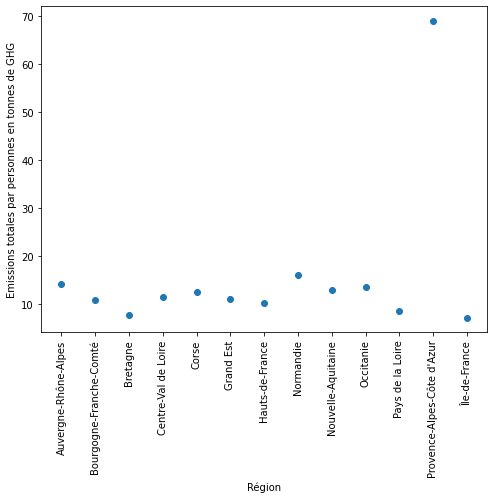

In [160]:
plt.figure(figsize = (8,6))
plt.scatter(emissions_communes_reg['region_name'], emissions_communes_reg['emissions_par_personne'])
plt.xticks(rotation = 90)
plt.xlabel('Région')
plt.ylabel('Emissions totales par personnes en tonnes de GHG')

Polars fonctionne comme pandas sur ce point là, je n'ai qu'à importer le travail fait sur le notebook pandas.

Je suis surpris de voir que la région d'île de france soit aussi basse dans la quantité d'émissions par personne en comparaison à la région de la côte d'azur qui elle est vraiment au dessus de toutes les autres régions. C'est sans doute dû au grand nombre de personnes résidant en île de France comparé à la région PACA. On peut d'ailleurs visualiser ce nombre ensuite :

Text(0, 0.5, "Nombre d'habitants")

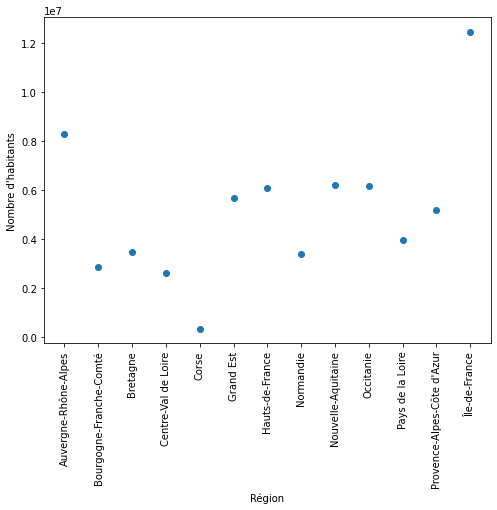

In [161]:
plt.figure(figsize = (8,6))
plt.scatter(emissions_communes_reg['region_name'],emissions_communes_reg['population_totale'])
plt.xticks(rotation = 90)
plt.xlabel('Région')
plt.ylabel('Nombre d\'habitants')

On voit donc effectivement que en île de France le nombre d'habitants extrêmement élevé à un impact important sur les emissions de GHG par personne comparé à la région PACA aussi très polluante mais moins peuplée. On va tracer une double échelle avec les émissions totales pour croiser les données et comparer d'une région à l'autre. Je demande à chatGPT la syntaxe pour créer 2 ordonnées sur un même graphique, ainsi que le site https://koor.fr/Python/Tutoriel_Scipy_Stack/matplotlib_multiples_diagrammes.wp qui traite un exemple pour afficher 2 ordonnées.  

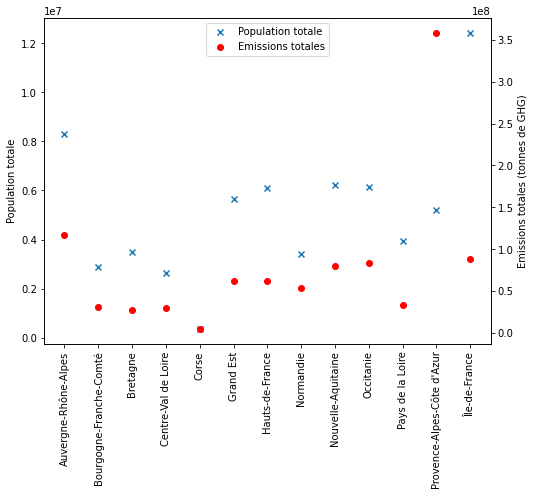

In [162]:
fig, ax1 = plt.subplots(figsize = (8,6))
ax1.scatter(emissions_communes_reg['region_name'],emissions_communes_reg['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(emissions_communes_reg['region_name'],emissions_communes_reg['emissions_totales_reg'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

Ce graphique permet de mieux visualiser pourquoi la région PACA est si excentrée par rapport aux autres régions. C'est en réalité la région la plus polluante, bien au delà de l'île de France comme je le pensais personnelement. 

On visualise maintenant la quantité d'émissions par département. Pour des raisons de lisibilité j'ai du scinder les données en 2 parties.

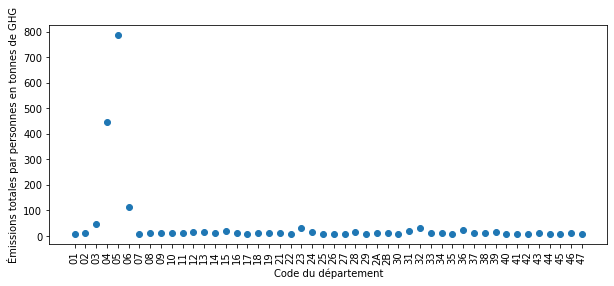

In [163]:
plt.figure(figsize = (10,8))

données_limités_début = emissions_communes_dep.head(emissions_communes_dep.shape[0]//2)

plt.scatter(range(len(données_limités_début)), données_limités_début['emissions_par_personne'])

plt.xticks(ticks=range(len(données_limités_début)), labels=données_limités_début['departement_code'], rotation=90)

# Étiquettes et titre
plt.xlabel('Code du département')
plt.ylabel('Émissions totales par personnes en tonnes de GHG')
plt.subplots_adjust(bottom=0.5)

On voit que les départements 4 et 5 sortent du lot, pour avoir davantage d'information sur les autres départements on va tracer la même courbe privé de ces deux départements. 

Contrairement à pandas ici on n'a pas de problème pour traiter les données littérales avec matplotlib. En revanche je me suis appuyé sur chatGPT pour l'emploi de la fonction filter, et sur la docmentation en ligne de polars pour les fonction is_in et not_

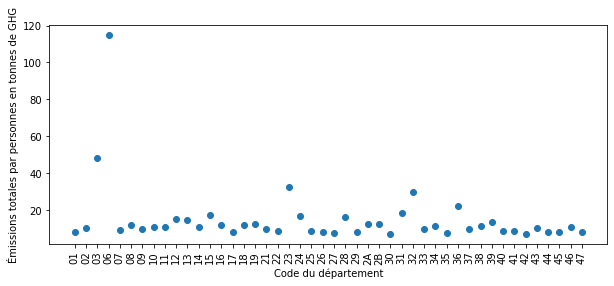

In [164]:
plt.figure(figsize = (10,8))

donnees_limitees_debut = emissions_communes_dep.head(emissions_communes_dep.shape[0]//2)
donnees_limitees_debut = donnees_limitees_debut.filter(pl.col('departement_code').is_in(['04', '05']).not_())

plt.scatter(range(len(donnees_limitees_debut)), donnees_limitees_debut['emissions_par_personne'])

plt.xticks(ticks=range(len(donnees_limitees_debut)), labels=donnees_limitees_debut['departement_code'], rotation=90)

# Étiquettes et titre
plt.xlabel('Code du département')
plt.ylabel('Émissions totales par personnes en tonnes de GHG')
plt.subplots_adjust(bottom=0.5)

On enlève aussi le département 6 qui écrase l'échelle 

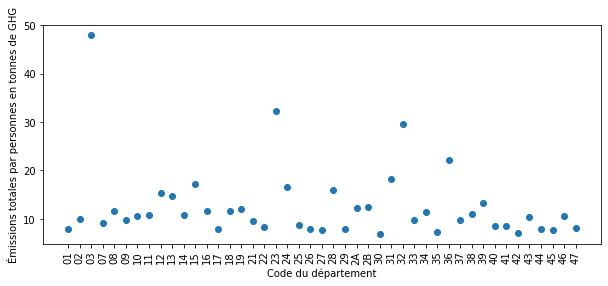

In [165]:
plt.figure(figsize = (10,8))

donnees_limitees_debut = emissions_communes_dep.head(emissions_communes_dep.shape[0]//2)
donnees_limitees_debut = donnees_limitees_debut.filter(pl.col('departement_code').is_in(['04', '05','06']).not_())

plt.scatter(range(len(donnees_limitees_debut)), donnees_limitees_debut['emissions_par_personne'])

plt.xticks(ticks=range(len(donnees_limitees_debut)), labels=donnees_limitees_debut['departement_code'], rotation=90)

# Étiquettes et titre
plt.xlabel('Code du département')
plt.ylabel('Émissions totales par personnes en tonnes de GHG')
plt.subplots_adjust(bottom=0.5)

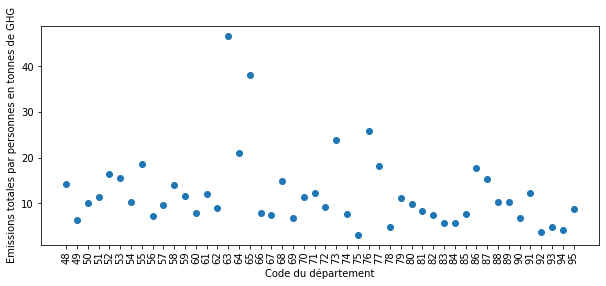

In [166]:
plt.figure(figsize = (10,8))

données_limités_début = emissions_communes_dep.tail((emissions_communes_dep.shape[0]//2))

plt.scatter(données_limités_début['departement_code'], données_limités_début['emissions_par_personne'])

plt.xlabel('Code du département')
plt.ylabel('Emissions totales par personnes en tonnes de GHG')
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.5)

On retrouve des résultats similaires à ceux de pandas.

La plupart des départements ont donc une quantité d'émissions par perosnne comprise entre 10 et 20 tonnes de GHG par an. LA moyenne mondiale est de 4,4 tonnes par an, la France, on voit donc que, comme la plupart des pays développés la France est un pays pollueurs. Les départements 4,5 et 6 correspondent respectivement à Alpes-Haute-Provence, Hautes-Alpes et Alpes-Maritime. Pour savoir pourquoi ils sont si hauts, on va tracer le double graphique population - emissions.

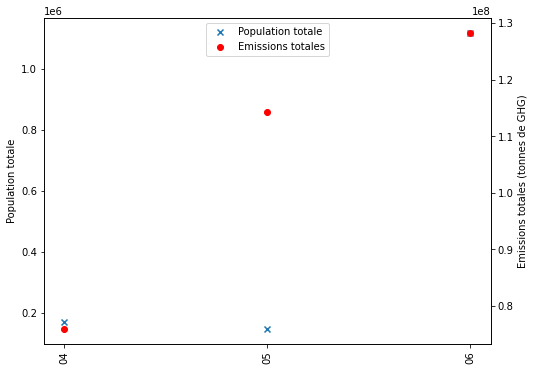

In [167]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = emissions_communes_dep.filter(pl.col('departement_code').is_in(['04', '05', '06']))
ax1.scatter(selected_data['departement_code'],selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(selected_data['departement_code'],selected_data['emissions_totales_dep'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center')

Comme dans le cas des régions, cela est dû à une grande différence entre la population totale et la quantité d'émissions. A titre de comparaison on fait la même chose pour les autres données.

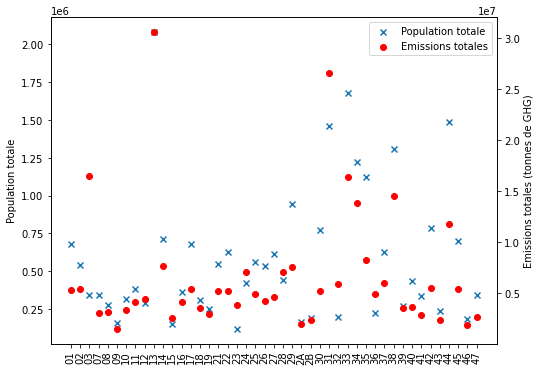

In [168]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = emissions_communes_dep.head((emissions_communes_dep.shape[0]//2))
selected_data = selected_data.filter(pl.col('departement_code').is_in(['04', '05', '06']).not_())
ax1.scatter(selected_data['departement_code'],selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(selected_data['departement_code'],selected_data['emissions_totales_dep'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

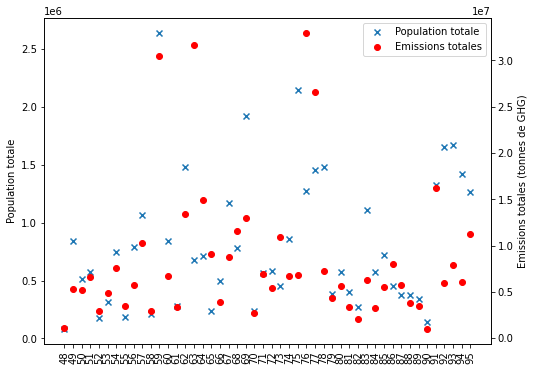

In [169]:
fig, ax1 = plt.subplots(figsize = (8,6))
selected_data = emissions_communes_dep.tail((emissions_communes_dep.shape[0]//2))
selected_data = selected_data.filter(pl.col('departement_code').is_in(['04', '05', '06']).not_())
ax1.scatter(selected_data['departement_code'],selected_data['population_totale'], marker = 'x', label = 'Population totale')
ax1.set_ylabel('Population totale')
plt.xticks(rotation = 90)
ax2 = ax1.twinx()

ax2.scatter(selected_data['departement_code'],selected_data['emissions_totales_dep'],color = 'red', marker = 'o', label = 'Emissions totales')
ax2.set_ylabel('Emissions totales (tonnes de GHG)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

En effet on voit bien que tout les autres départements n'ont pas de différences extrêmes entre les émissions et la population. Les valeurs extrêmes que l'on rencontre peuvent être dû à l'erreur commise lors de la gestion des valeurs manquantes.

On pourrait tracer aussi les caractéristiques liées aux différentes communes mais la grande quantité de commune rendrait illisible le graphique. On va le faire pour les grandes métropoles de France à savoir : Paris, Lyon, Marseille, Lille, Toulouse et Bordeaux, auxquelles j'ajoute à titre de comparaison Strasbourg, Nice, Grenoble, Montpellier, Orléans, Brest, Nantes. Pour paris, Marseille et Lyon les noms sont donnés à partir des arrondissements. N'ayant pas trouvé sur internet un moyen d'extraire tout les arrondissemnts d'un coup comme cela peut exister en SQL avec le terme 'LIKE' je l'ai fait à la main.

Text(0, 0.5, 'Emissions par personne (tonnes GHG)')

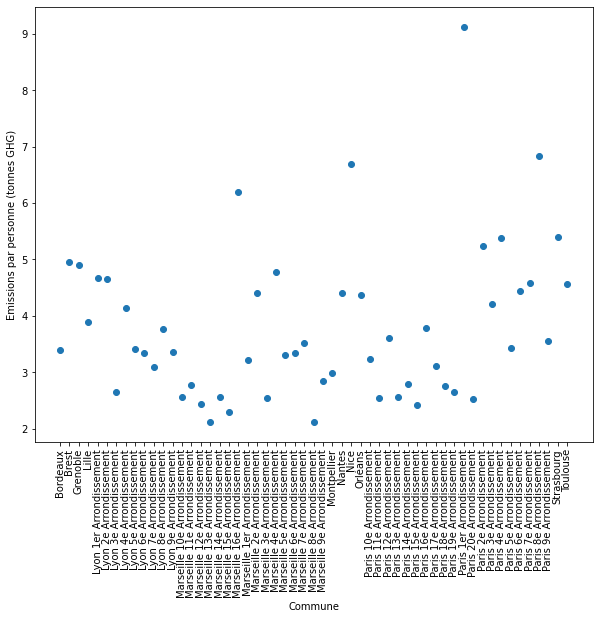

In [171]:
villes = ['Paris 1er Arrondissement', 'Paris 2e Arrondissement',  'Paris 3e Arrondissement', 'Paris 4e Arrondissement', 'Paris 5e Arrondissement',
          'Paris 6e Arrondissement', 'Paris 7e Arrondissement','Paris 8e Arrondissement', 'Paris 9e Arrondissement',
          'Paris 10e Arrondissement', 'Paris 11e Arrondissement', 'Paris 12e Arrondissement', 'Paris 13e Arrondissement',
          'Paris 14e Arrondissement', 'Paris 15e Arrondissement', 'Paris 16e Arrondissement', 'Paris 17e Arrondissement',
          'Paris 18e Arrondissement', 'Paris 19e Arrondissement', 'Paris 20e Arrondissement', 'Marseille 1er Arrondissement', 'Marseille 2e Arrondissement', 
          'Marseille 3e Arrondissement', 'Marseille 4e Arrondissement', 'Marseille 5e Arrondissement', 'Marseille 6e Arrondissement', 
          'Marseille 7e Arrondissement', 'Marseille 8e Arrondissement', 'Marseille 9e Arrondissement', 'Marseille 10e Arrondissement', 
          'Marseille 11e Arrondissement', 'Marseille 12e Arrondissement', 'Marseille 13e Arrondissement', 'Marseille 14e Arrondissement', 'Marseille 15e Arrondissement',
          'Marseille 16e Arrondissement', 'Lyon 1er Arrondissement', 'Lyon 2e Arrondissement', 'Lyon 3e Arrondissement',
          'Lyon 4e Arrondissement', 'Lyon 5e Arrondissement', 'Lyon 6e Arrondissement', 'Lyon 7e Arrondissement', 
          'Lyon 8e Arrondissement', 'Lyon 9e Arrondissement', 'Lille', 'Bordeaux', 'Toulouse', 'Nice', 'Strasbourg', 
          'Nantes', 'Orléans', 'Montpellier', 'Grenoble', 'Brest']
selected_data = emissions_communes_df.group_by('commune').sum()
colonnes = ['agriculture_filled', 'transports_filled', 'transports_international_filled', 'biomasse_hors-total_co2', 'dechets_filled', 'energie_filled', 'industrie_hors-energie_filled', 'residentiel_filled', 'routier_filled', 'tertiaire']

selected_data= selected_data.with_columns(emissions_totales_com = pl.sum_horizontal(colonnes))
selected_data = selected_data.with_columns(emissions_par_personne = pl.col('emissions_totales_com')/pl.col('population_totale'))

selected_data = selected_data.filter(pl.col('commune').is_in(villes))
selected_data = selected_data.sort('commune')
plt.figure(figsize = (10,8))
plt.scatter(selected_data['commune'], selected_data['emissions_par_personne'])
plt.xticks(rotation = 90)
plt.xlabel('Commune')
plt.ylabel('Emissions par personne (tonnes GHG)')




Par manque de temps je n'ai pas réussi à finir le reste des graphiques produits avec pandas, je vous transmets tout de même cette version incomplète.